#### Medical Cost Project

Several factors influence how much one pays for insurance and this dataset gives a breakdown of some of the factors. The objective of this analysis is to explore the gender based differences in relation to medical cost insuarance.
I will be guided by the following questions;

1. Is there any significant difference in medical costs billed between genders?
2. Do beneficiaries with more dependents, categorized by gender, tend to have higher medical costs billed?
3. Is there a significant difference in medical costs billed between male and female smokers compared to male and female non-smokers?
4. Do male and female beneficiaries from certain regions tend to have higher medical costs billed compared to those from other regions?
5. Does gender have a significant impact on medical charges among individuals with different BMI categories, particularly focusing on overweight individuals (25.0 <= BMI < 30.0) and obese individuals (BMI >= 30)

The dataset is composed of 1338 instances (rows) and 7 features (columns). Here are the features;

1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index,
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
7. Charges :- Individual medical costs billed to health insurance

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import levene
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import ttest_ind
from scipy.stats import shapiro, levene, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [28]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates()

In [8]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [9]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [21]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [10]:
# Distribution of Male and Female in the dataset

gender_counts = df['sex'].value_counts()
total_count = df.shape[0]
male_count = gender_counts['male']
female_count = gender_counts['female']
male_proportion = male_count / total_count 
female_proportion = female_count / total_count
print("The proportion of males is: {:.2%}, females: {:.2%}".format(male_proportion, female_proportion))

The proportion of males is: 50.49%, females: 49.51%


In [11]:
df['charges'] = df['charges'].round(2)
df['bmi'] = df['bmi'].round(0)

In [32]:
# Filter the DataFrame for individuals with BMI between 25.0 and 30.0
overweight = df[(df['bmi'] >= 25.0) & (df['bmi'] < 30.0)]

# Filter the DataFrame for obese individuals (BMI >= 30)
obese_individuals = df[df['bmi'] >= 30.0]

# Add a new column to differentiate between BMI categories
overweight['BMI Category'] = '25.0 <= BMI < 30.0'
obese_individuals['BMI Category'] = 'BMI >= 30'

# Concatenate the two filtered DataFrames
combined_df = pd.concat([overweight, obese_individuals])

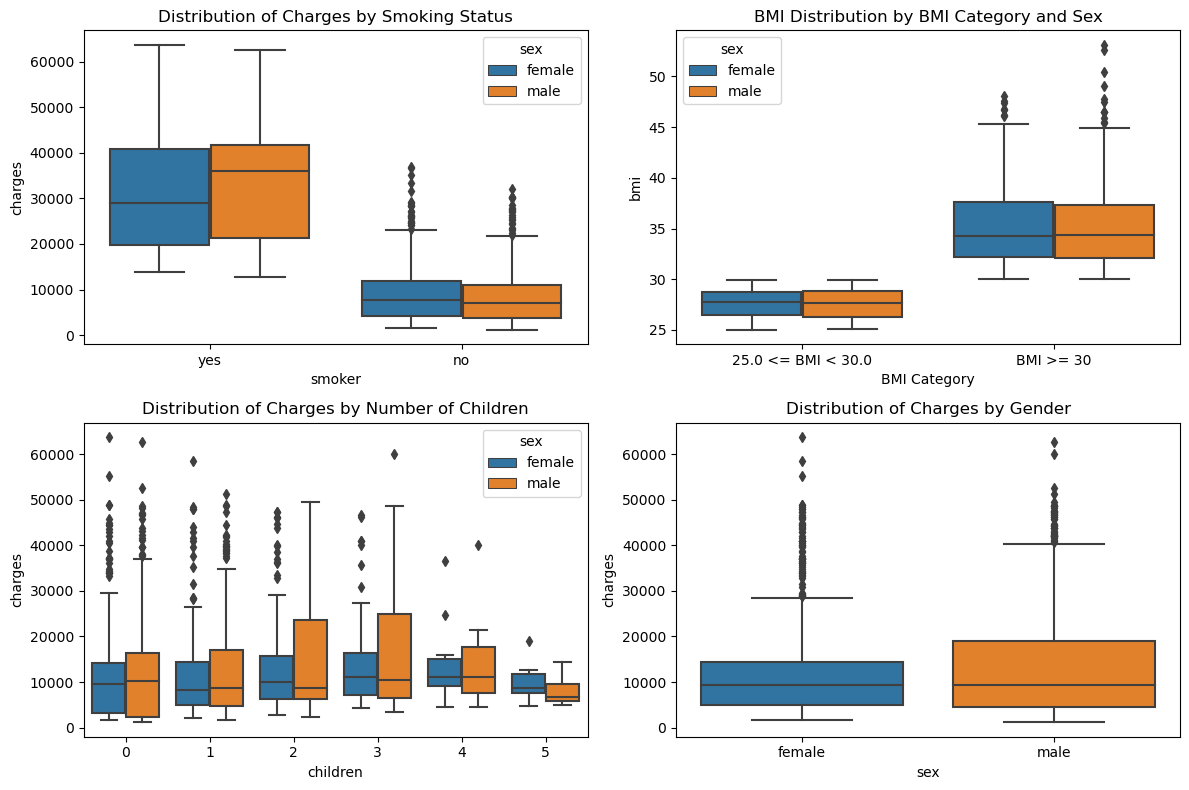

In [33]:
# Set up the figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Box plot for smokers
sns.boxplot(x='smoker', y='charges', hue='sex', data=df, ax=axes[0,0])
axes[0,0].set_title('Distribution of Charges by Smoking Status')

# Box plot for Overweight and Obese 
sns.boxplot(x='BMI Category', y='bmi', hue='sex', data=combined_df, ax=axes[0,1])
axes[0,1].set_title('BMI Distribution by BMI Category and Sex')

# Box plot for regions
#sns.boxplot(x='region', y='charges', hue='sex', data=df, ax=axes[0,1])
#axes[0,1].set_title('Distribution of Charges by Region')

# Box plot for number of children
sns.boxplot(x='children', y='charges', hue='sex', data=df, ax=axes[1,0])
axes[1,0].set_title('Distribution of Charges by Number of Children')

# Box plot for gender
sns.boxplot(x='sex', y='charges', data=df, ax=axes[1,1])
axes[1,1].set_title('Distribution of Charges by Gender')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Is there any significant difference in medical costs billed between genders?

1. Check Normality and Variance
2. With the above results, use the appropriate test to test the significant difference

In [13]:
df_cleaned2 = df.dropna()

# Extract charges for male and female separately
charges_male = df_cleaned2[df_cleaned2['sex'] == 'male']['charges']
charges_female = df_cleaned2[df_cleaned2['sex'] == 'female']['charges']

# Shapiro-Wilk test for normality
shapiro_stat_male, shapiro_pvalue_male = shapiro(charges_male)
shapiro_stat_female, shapiro_pvalue_female = shapiro(charges_female)

# Levene's test for equality of variances
levene_stat, levene_pvalue = levene(charges_male, charges_female)

# Print test results
print("Shapiro-Wilk test results for normality:")
print("Male: Statistic =", shapiro_stat_male, ", p-value =", shapiro_pvalue_male)
print("Female: Statistic =", shapiro_stat_female, ", p-value =", shapiro_pvalue_female)

print("\nLevene's test results for equality of variances:")
print("Statistic =", levene_stat, ", p-value =", levene_pvalue)

Shapiro-Wilk test results for normality:
Male: Statistic = 0.8230364322662354 , p-value = 1.2707258039675783e-26
Female: Statistic = 0.8053944110870361 , p-value = 1.8305655972609575e-27

Levene's test results for equality of variances:
Statistic = 9.924362234609646 , p-value = 0.0016672618756968579


The Shapiro-Wilk test results indicate that the charges for both male and female groups are not normally distributed, as evidenced by the very low p-values (both p-values are close to 0). This suggests that the assumption of normality is violated for both groups.

Levene's test results indicate that the variances of charges between male and female groups are significantly different, as evidenced by the low p-value (p-value < 0.05). This violates the assumption of equality of variances between groups.

Since the assumptions of normality and equal variances are both violated, conducting parametric tests such as the two-sample t-test is not appropriate. Instead, non-parametric tests like the Mann-Whitney U test can be used to compare charges between male and female groups, as they do not rely on these assumptions.

In [14]:
# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(charges_male, charges_female)

# Print the result
print("Mann-Whitney U test result:")
print("Test statistic:", u_statistic)
print("p-value:", p_value)

Mann-Whitney U test result:
Test statistic: 226198.0
p-value: 0.6944793894954917


The Mann-Whitney U test results indicate that there is no significant difference in medical costs billed (charges) between male and female groups.

Since the p-value (0.6945) is greater than the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis. This suggests that there is insufficient evidence to conclude that there are differences in charges between male and female groups.

Therefore, based on the Mann-Whitney U test, we do not find evidence to support the hypothesis that there is a significant difference in medical costs billed between genders.

### Do beneficiaries with more dependents, categorized by gender, tend to have higher medical costs billed?

In [16]:
# Create dummy variables for 'sex' column
df2 = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Now 'sex_male' column should exist
#print(df2.head())

# Perform regression analysis
import statsmodels.api as sm

# Define predictor variables (X) and outcome variable (y)
X = df2[['children', 'sex_male']]  # Include gender as a predictor
X = sm.add_constant(X)  # Add constant term
y = df2['charges']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.225
Date:                Mon, 29 Apr 2024   Prob (F-statistic):            0.00549
Time:                        22:02:41   Log-Likelihood:                -14462.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1334   BIC:                         2.894e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.185e+04    553.855     21.402      0.0

In [20]:
# Convert 'sex' column to dummy variables
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Method to analyze the impact of the number of children on insurance charges for males and females
def analyze_children_discrepancy(data):
    # Calculate the discrepancy of insurance charges between males and females for each group
    children_discrepancy = {}
    children_groups = data.groupby('children')
    
    for children, group in children_groups:
        male_charges = group[group['sex_male'] == 1]['charges']
        female_charges = group[group['sex_male'] == 0]['charges']
        
        male_average_charge = male_charges.mean()
        female_average_charge = female_charges.mean()
        
        discrepancy = female_average_charge - male_average_charge
        children_discrepancy[children] = discrepancy
    
    discrepancies_df = pd.DataFrame(children_discrepancy.items(), columns=['Number of Children', 'Discrepancy'])
    
    return discrepancies_df

discrepancies_df = analyze_children_discrepancy(df)
print(discrepancies_df)

   Number of Children  Discrepancy
0                   0  -966.395388
1                   1 -1112.162033
2                   2 -2245.777893
3                   3 -2923.562690
4                   4   155.387208
5                   5  1922.347250


> Number of Children: This column represents the number of children in each group.
Discrepancy: This column represents the difference in average insurance charges between males and females for each group of children.
A negative value indicates that, on average, females have higher insurance charges compared to males.
A positive value indicates that, on average, males have higher insurance charges compared to females.

> The result shows that the number of children can influence the discrepancy of insurance costs between males and females. For groups with no children up to three children, on average, males have insurance costs that are lower than females. However, for groups with four or five children, females tend to have higher costs compared to males.

> For groups with no children to three children, males tend to have lower insurance costs compared to females. This is indicated by negative discrepancies, meaning that, on average, females have higher insurance costs than males in these groups.

> However, for groups with four or five children, females tend to have higher insurance costs compared to males. This is indicated by positive discrepancies, meaning that, on average, males have lower insurance costs than females in these groups.

> These findings suggest that the number of children can indeed influence the discrepancy of insurance costs between males and females. It's worth noting that insurance costs can be influenced by various factors, and the presence of children may interact with other variables to impact insurance costs differently for males and females.

### Is there a significant difference in medical costs billed between male and female smokers compared to male and female non-smokers?

In [29]:
def smoker_percentage(df):
    # Filter the DataFrame for male smokers
    male_smokers = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]
    
    # Count the total number of males
    total_male_count = len(df[df['sex'] == 'male'])
    
    # Count the number of male smokers
    smoker_male_count = len(male_smokers)
    
    # Calculate the percentage of male smokers
    smoker_male_percentage = (smoker_male_count / total_male_count) * 100
    
    # Filter the DataFrame for female smokers
    female_smokers = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]
    
    # Count the total number of females
    total_female_count = len(df[df['sex'] == 'female'])
    
    # Count the number of female smokers
    smoker_female_count = len(female_smokers)
    
    # Calculate the percentage of female smokers
    smoker_female_percentage = (smoker_female_count / total_female_count) * 100
    
    # Format the percentages into a string
    result = "Percentage of smokers among males is {:.2f}%, females: {:.2f}%".format(smoker_male_percentage, smoker_female_percentage)
    
    return result

# Assuming 'df' is your DataFrame containing the data
print(smoker_percentage(df))

Percentage of smokers among males is 23.52%, females: 17.37%


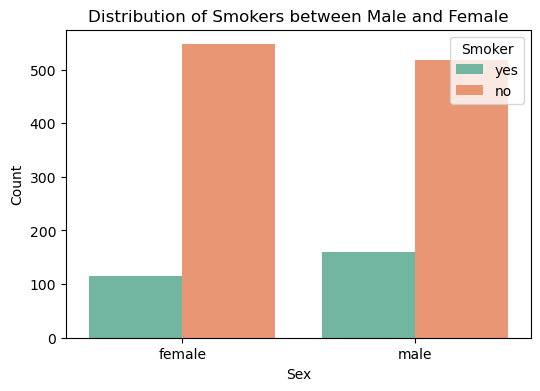

In [36]:
# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='smoker', data=df, palette='Set2')
plt.title('Distribution of Smokers between Male and Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()

> Percentage of Smokers among Males and Females:
The percentages of smokers among males and females are provided as additional context.
The percentage of smokers among males (23.52%) is higher than the percentage of smokers among females (17.37%).
This suggests that a higher proportion of males in the dataset are smokers compared to females.

In [30]:
def check_normality_and_variance(df):
    # Filter the DataFrame for male and female smokers
    male_smokers = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]
    female_smokers = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]
    
    # Filter the DataFrame for male and female non-smokers
    male_non_smokers = df[(df['sex'] == 'male') & (df['smoker'] == 'no')]
    female_non_smokers = df[(df['sex'] == 'female') & (df['smoker'] == 'no')]
    
    # Conduct Shapiro-Wilk test for normality
    stat_male_smokers, p_value_male_smokers = shapiro(male_smokers['charges'])
    stat_female_smokers, p_value_female_smokers = shapiro(female_smokers['charges'])
    stat_male_non_smokers, p_value_male_non_smokers = shapiro(male_non_smokers['charges'])
    stat_female_non_smokers, p_value_female_non_smokers = shapiro(female_non_smokers['charges'])
    
    # Conduct Levene's test for equality of variances
    stat_var_male, p_value_var_male = levene(male_smokers['charges'], male_non_smokers['charges'])
    stat_var_female, p_value_var_female = levene(female_smokers['charges'], female_non_smokers['charges'])
    
    return (p_value_male_smokers, p_value_female_smokers, p_value_male_non_smokers, p_value_female_non_smokers), (p_value_var_male, p_value_var_female)

# Assuming 'df' is your DataFrame containing the data
normality_p_values, variance_p_values = check_normality_and_variance(df)

print("P-values for normality tests:")
print("Male Smokers:", normality_p_values[0])
print("Female Smokers:", normality_p_values[1])
print("Male Non-Smokers:", normality_p_values[2])
print("Female Non-Smokers:", normality_p_values[3])
print("\nP-values for variance tests:")
print("Male:", variance_p_values[0])
print("Female:", variance_p_values[1])

P-values for normality tests:
Male Smokers: 2.0795750970137306e-06
Female Smokers: 1.6861573385540396e-05
Male Non-Smokers: 4.592230495494514e-20
Female Non-Smokers: 3.2060484547305744e-21

P-values for variance tests:
Male: 1.3253712426389895e-28
Female: 5.802740739908003e-34


> Normality Tests:

For both male and female smokers, as well as male and female non-smokers, the p-values obtained from the Shapiro-Wilk tests are all less than 0.05.
This suggests that we reject the null hypothesis of normality for all groups. In other words, the data for medical costs billed is not normally distributed in any of the groups.

> Variance Tests:

For both male and female groups, the p-values obtained from Levene's tests for equality of variances are extremely small (much less than 0.05).
This suggests that we reject the null hypothesis of equal variances for both male and female groups. In other words, the variances of medical costs billed are not equal between male and female groups.

> Given that the assumptions of normality and equal variances are violated, it's appropriate to use non-parametric tests or robust methods for comparing the medical costs between male and female smokers and non-smokers. One option could be the Mann-Whitney U test, which is a non-parametric alternative to the independent samples t-test.

In [31]:
def mann_whitney_u_test(df):
    # Filter the DataFrame for male and female smokers
    male_smokers = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]
    female_smokers = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]
    
    # Filter the DataFrame for male and female non-smokers
    male_non_smokers = df[(df['sex'] == 'male') & (df['smoker'] == 'no')]
    female_non_smokers = df[(df['sex'] == 'female') & (df['smoker'] == 'no')]
    
    # Perform Mann-Whitney U test for male smokers vs. male non-smokers
    stat_male, p_value_male = mannwhitneyu(male_smokers['charges'], male_non_smokers['charges'])
    
    # Perform Mann-Whitney U test for female smokers vs. female non-smokers
    stat_female, p_value_female = mannwhitneyu(female_smokers['charges'], female_non_smokers['charges'])
    
    return p_value_male, p_value_female

# Assuming 'df' is your DataFrame containing the data
p_value_male, p_value_female = mann_whitney_u_test(df)

print("Mann-Whitney U test p-value for male smokers vs. male non-smokers:", p_value_male)
print("Mann-Whitney U test p-value for female smokers vs. female non-smokers:", p_value_female)

Mann-Whitney U test p-value for male smokers vs. male non-smokers: 1.5445407334345847e-74
Mann-Whitney U test p-value for female smokers vs. female non-smokers: 1.6913753451247513e-56


Mann-Whitney U Test Results:
The Mann-Whitney U test p-values for both male smokers vs. male non-smokers and female smokers vs. female non-smokers are significantly small (much less than 0.05).
This indicates a significant difference in medical costs billed between smokers and non-smokers within both gender groups.
Specifically, for both males and females, individuals who smoke tend to have significantly higher medical costs billed compared to those who do not smoke.

> The significantly small p-values from the Mann-Whitney U tests indicate that smoking status has a significant impact on medical costs billed, regardless of gender.

 - Additionally, the higher percentage of male smokers compared to female smokers suggests that the higher prevalence of smoking among males could contribute to the observed difference in medical costs between male and female smokers.
 
Overall, these results highlight the importance of smoking cessation efforts and the potential financial implications of smoking on healthcare costs, emphasizing the need for targeted interventions to reduce smoking rates and improve public health outcomes.

### Do male and female beneficiaries from certain regions tend to have higher medical costs billed compared to those from other regions?

### Does gender have a significant impact on medical charges among individuals with different BMI categories, particularly focusing on overweight individuals (25.0 <= BMI < 30.0) and obese individuals (BMI >= 30)

In [55]:
# medical charges among individuals with different BMI categories, particularly focusing on overweight individuals 

# Filter the data for overweight and obese individuals
overweight_data = df[(df['bmi'] >= 25.0) & (df['bmi'] < 30.0)]
obese_data = df[df['bmi'] >= 30.0]

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(overweight_data['charges'], obese_data['charges'])

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in charges between overweight and obese individuals.")
else:
    print("There is no significant difference in charges between overweight and obese individuals.")

Mann-Whitney U test statistic: 121626.0
p-value: 0.002958017122337365
There is a significant difference in charges between overweight and obese individuals.


Does gender have a significant impact on the above difference?

In [53]:
def smoker_percentage(df):
    # Filter the DataFrame for overweight males and count smokers
    overweight_males = df[(df['sex'] == 'male') & (df['bmi'] >= 25.0) & (df['bmi'] < 30.0)]
    overweight_male_smokers = overweight_males[overweight_males['smoker'] == 'yes']
    overweight_male_count = len(overweight_males)
    overweight_male_smoker_count = len(overweight_male_smokers)
    
    # Calculate the percentage of overweight male smokers
    overweight_male_smoker_percentage = (overweight_male_smoker_count / overweight_male_count) * 100
    
    # Filter the DataFrame for overweight females and count smokers
    overweight_females = df[(df['sex'] == 'female') & (df['bmi'] >= 25.0) & (df['bmi'] < 30.0)]
    overweight_female_smokers = overweight_females[overweight_females['smoker'] == 'yes']
    overweight_female_count = len(overweight_females)
    overweight_female_smoker_count = len(overweight_female_smokers)
    
    # Calculate the percentage of overweight female smokers
    overweight_female_smoker_percentage = (overweight_female_smoker_count / overweight_female_count) * 100
    
    # Filter the DataFrame for obese males and count smokers
    obese_males = df[(df['sex'] == 'male') & (df['bmi'] >= 30.0)]
    obese_male_smokers = obese_males[obese_males['smoker'] == 'yes']
    obese_male_count = len(obese_males)
    obese_male_smoker_count = len(obese_male_smokers)
    
    # Calculate the percentage of obese male smokers
    obese_male_smoker_percentage = (obese_male_smoker_count / obese_male_count) * 100
    
    # Filter the DataFrame for obese females and count smokers
    obese_females = df[(df['sex'] == 'female') & (df['bmi'] >= 30.0)]
    obese_female_smokers = obese_females[obese_females['smoker'] == 'yes']
    obese_female_count = len(obese_females)
    obese_female_smoker_count = len(obese_female_smokers)
    
    # Calculate the percentage of obese female smokers
    obese_female_smoker_percentage = (obese_female_smoker_count / obese_female_count) * 100
    
    # Format the percentages into a string
    result = "Percentage of smokers among overweight males is {:.2f}%, females: {:.2f}%\n" \
             "Percentage of smokers among obese males is {:.2f}%, females: {:.2f}%".format(overweight_male_smoker_percentage,
                                                                                           overweight_female_smoker_percentage,
                                                                                           obese_male_smoker_percentage,
                                                                                           obese_female_smoker_percentage)
    
    return result

# Assuming 'df' is your DataFrame containing the data
print(smoker_percentage(df))

Percentage of smokers among overweight males is 22.99%, females: 15.58%
Percentage of smokers among obese males is 24.93%, females: 15.57%


In [51]:
# Filter the dataset for overweight individuals (25.0 <= BMI < 30.0) and obese individuals (BMI >= 30)
overweight_df = df[(df['bmi'] >= 25.0) & (df['bmi'] < 30.0)]
obese_df = df[df['bmi'] >= 30.0]

# Split the datasets into two groups based on gender
male_overweight = overweight_df[overweight_df['sex'] == 'male']
female_overweight = overweight_df[overweight_df['sex'] == 'female']

male_obese = obese_df[obese_df['sex'] == 'male']
female_obese = obese_df[obese_df['sex'] == 'female']

# Test for normality and variance within each group
def test_normality_and_variance(data):
    # Test for normality using Shapiro-Wilk test
    stat, p_value_norm = shapiro(data['charges'])
    
    # Calculate variance
    variance = np.var(data['charges'], ddof=1)
    
    return p_value_norm, variance

# Test normality and variance for overweight males and females
p_value_norm_overweight_male, variance_overweight_male = test_normality_and_variance(male_overweight)
p_value_norm_overweight_female, variance_overweight_female = test_normality_and_variance(female_overweight)

# Test normality and variance for obese males and females
p_value_norm_obese_male, variance_obese_male = test_normality_and_variance(male_obese)
p_value_norm_obese_female, variance_obese_female = test_normality_and_variance(female_obese)

print("Overweight Males - Normality:", p_value_norm_overweight_male, "Variance:", variance_overweight_male)
print("Overweight Females - Normality:", p_value_norm_overweight_female, "Variance:", variance_overweight_female)
print("Obese Males - Normality:", p_value_norm_obese_male, "Variance:", variance_obese_male)
print("Obese Females - Normality:", p_value_norm_obese_female, "Variance:", variance_obese_female)

Overweight Males - Normality: 1.161010843020449e-09 Variance: 73412935.577447
Overweight Females - Normality: 4.5609356569276116e-11 Variance: 56426279.14552228
Obese Males - Normality: 3.893294866512457e-20 Variance: 234505601.93562233
Obese Females - Normality: 9.658849880081756e-21 Variance: 184353105.1779729


In [52]:
# Perform Mann-Whitney U test for overweight individuals
statistic_overweight, p_value_overweight = mannwhitneyu(male_overweight['charges'], female_overweight['charges'])

# Perform Mann-Whitney U test for obese individuals
statistic_obese, p_value_obese = mannwhitneyu(male_obese['charges'], female_obese['charges'])

# Print the results
print("Overweight: Mann-Whitney U test statistic =", statistic_overweight, "p-value =", p_value_overweight)
print("Obese: Mann-Whitney U test statistic =", statistic_obese, "p-value =", p_value_obese)

Overweight: Mann-Whitney U test statistic = 18929.0 p-value = 0.7688115195969243
Obese: Mann-Whitney U test statistic = 64798.0 p-value = 0.3552181394548566


> For overweight individuals, the p-value is approximately 0.769. Since this p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference in charges between males and females within the overweight BMI category.

> For obese individuals, the p-value is approximately 0.355. Similarly, this p-value is greater than 0.05, indicating that we fail to reject the null hypothesis. Hence, there is no significant difference in charges between males and females within the obese BMI category.

In summary, based on the Mann-Whitney U test results, there is no evidence to suggest a significant difference in medical charges between males and females within either the overweight or obese BMI categories.